### Download test files and weights

In [1]:
# Download the same test files from the Cats vs Dogs ungraded lab
!wget -O cat1.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat1.jpg
!wget -O cat2.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat2.jpg
!wget -O catanddog.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/catanddog.jpg
!wget -O dog1.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/dog1.jpg
!wget -O dog2.jpg https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/dog2.jpg

# Download prepared weights
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kipXTxesGJKGY1B8uSPRvxROgOH90fih' -O 0_epochs.h5
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1oiV6tjy5k7h9OHGTQaf0Ohn3FmF-uOs1' -O 15_epochs.h5


--2021-10-12 08:29:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat1.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 414826 (405K) [image/jpeg]
Saving to: ‘cat1.jpg’

cat1.jpg            100%[===================>] 405.10K  --.-KB/s    in 0.02s   

2021-10-12 08:29:20 (18.2 MB/s) - ‘cat1.jpg’ saved [414826/414826]

--2021-10-12 08:29:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/MLColabImages/cat2.jpg
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.128, 172.217.219.128, 209.85.146.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 599639 (586K) [image/jpeg]
Saving to: ‘cat2.j

### Import the required packages

In [2]:
# YOUR CODE HERE
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model 
from tensorflow.keras.models import  Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, GlobalAveragePooling2D 
import cv2


### Download and prepare the dataset.



#### Load Cats vs Dogs 

* Use Tensorflow Datasets to fetch the `cats_vs_dogs` dataset. 
  * Use the first 80% of the *train* split of the said dataset to create your training set.
  * Set the `as_supervised` flag to create `(image, label)` pairs.
    
* We can create validation and test sets from the remaining 20% of the *train* split of `cats_vs_dogs` (i.e. we already used 80% for the train set). This is if we intend to train the model more

In [3]:
# Load the data and create the train set (optional: val and test sets)

# YOUR CODE HERE 
train_data = tfds.load('cats_vs_dogs', split='train[:80%]', as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteCPSPV4/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


#### Create preprocessing function

Define a function that takes in an image and label. This will:
  * cast the image to float32
  * normalize the pixel values to [0, 1]
  * resize the image to 300 x 300


In [4]:
def augmentimages(image, label):
  # YOUR CODE HERE 
  image = tf.cast(image, tf.float32) 
  image = (image/255)
  image = tf.image.resize(image,(300,300))


  return image, label

#### Preprocess the training set

Use the `map()` and pass in the method that we just defined to preprocess the training set.


In [5]:
augmented_training_data =  train_data.map(augmentimages)   # YOUR CODE HERE

#### Create batches of the training set. 

In [6]:
train_batches = augmented_training_data.shuffle(1024).batch(32)

### Build the Cats vs Dogs classifier 

* Modify the Cats vs Dogs model at the last dense layer to output 2 neurons instead of 1. 
  - This is because you will adapt the `do_salience()` function from the lab and that works with one-hot encoded labels. 
  - We can do this by changing the `units` argument of the output Dense layer from 1 to 2, with one for each of the classes (i.e. cats and dogs).
  - We should choose an activation that outputs a probability for each of the 2 classes (i.e. categories), where the sum of the probabilities adds up to 1.

In [7]:
model = tf.keras.models.Sequential()
model.add(Conv2D(16,input_shape=(300,300,3),kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       7

### Create a function to generate the saliency map

In [8]:
def do_salience(image, model, label, prefix):
  '''
  Generates the saliency map of a given image.

  Args:
    image (file) -- picture that the model will classify
    model (keras Model) -- your cats and dogs classifier
    label (int) -- ground truth label of the image
    prefix (string) -- prefix to add to the filename of the saliency map
  '''

  # Read the image and convert channel order from BGR to RGB
  img = cv2.imread(image) 
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 


  # Resize the image to 300 x 300 and normalize pixel values to the range [0, 1]
  img = cv2.resize(img, (300,300)) / 255.0
  

  # Add an additional dimension (for the batch), and save this in a new variable
  tensor_image = np.expand_dims(img, axis=0)



  # Declare the number of classes
  num_classes = 2



  # Define the expected output array by one-hot encoding the label
  # The length of the array is equal to the number of classes
  expected_output = tf.one_hot([label] * tensor_image.shape[0], num_classes)
  


  # Witin the GradientTape block:
  # Cast the image as a tf.float32
  # Use the tape to watch the float32 image
  # Get the model's prediction by passing in the float32 image
  # Compute an appropriate loss
  # between the expected output and model predictions.
  # you may want to print the predictions to see if the probabilities adds up to 1
  with tf.GradientTape() as tape : 
    inputs = tf.cast(tensor_image, tf.float32)

    tape.watch(inputs) 

    predictions = model(inputs) 

    loss = tf.keras.losses.categorical_crossentropy(
        expected_output, predictions
    ) 
    print(predictions) 

  



  # get the gradients of the loss with respect to the model's input image
  gradients = tape.gradient(loss, inputs)


    
  # generate the grayscale tensor
  grayscale_tensor = tf.reduce_sum(tf.abs(gradients), axis=-1) 




  # normalize the pixel values to be in the range [0, 255].
  # the max value in the grayscale tensor will be pushed to 255.
  # the min value will be pushed to 0.
  # Use the formula: 255 * (x - min) / (max - min)
  # Use tf.reduce_max, tf.reduce_min
  # Cast the tensor as a tf.uint8
  normalized_tensor = tf.cast(
    255
    * (grayscale_tensor - tf.reduce_min(grayscale_tensor))
    / (tf.reduce_max(grayscale_tensor) - tf.reduce_min(grayscale_tensor)),
    tf.uint8,
       ) 
  

    
  # Remove dimensions that are size 1
  normalized_tensor = tf.squeeze(normalized_tensor) 
   
    
  # plot the normalized tensor
  # Set the figure size to 8 by 8
  # do not display the axis
  # use the 'gray' colormap
  # This code is provided for you.
  plt.figure(figsize=(8, 8))
  plt.axis('off')
  plt.imshow(normalized_tensor, cmap='gray')
  plt.show()

  # optional: superimpose the saliency map with the original image, then display it.
  # we encourage you to do this to visualize your results better


  # save the normalized tensor image to a file. this is already provided for you.
  salient_image_name = prefix + image
  normalized_tensor = tf.expand_dims(normalized_tensor, -1)
  normalized_tensor = tf.io.encode_jpeg(normalized_tensor, quality=100, format='grayscale')
  writer = tf.io.write_file(salient_image_name, normalized_tensor)

### Generate saliency maps with untrained model

As a sanity check, we will load initialized (i.e. untrained) weights and use the function we just implemented. 
- This will check if we built the model correctly and are able to create a saliency map. 

If an error pops up when loading the weights or the function does not run, check the implementation for bugs.

Apply `do_salience()` function on the following image files:

* `cat1.jpg`
* `cat2.jpg`
* `catanddog.jpg`
* `dog1.jpg`
* `dog2.jpg`

Cats will have the label `0` while dogs will have the label `1`. 
- For the catanddog, use `0`. 
- For the prefix of the salience images that will be generated, use the prefix `epoch0_salient`.

tf.Tensor([[0.49321154 0.5067885 ]], shape=(1, 2), dtype=float32)


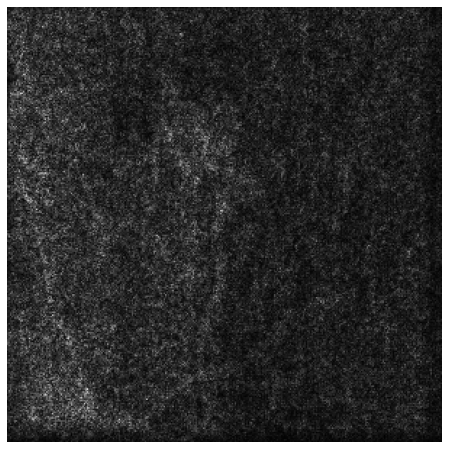

tf.Tensor([[0.49322364 0.5067764 ]], shape=(1, 2), dtype=float32)


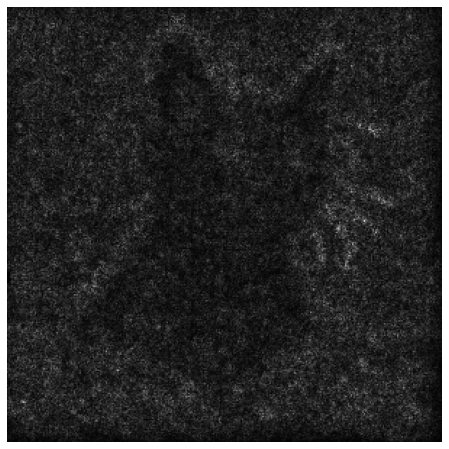

tf.Tensor([[0.4922674 0.5077326]], shape=(1, 2), dtype=float32)


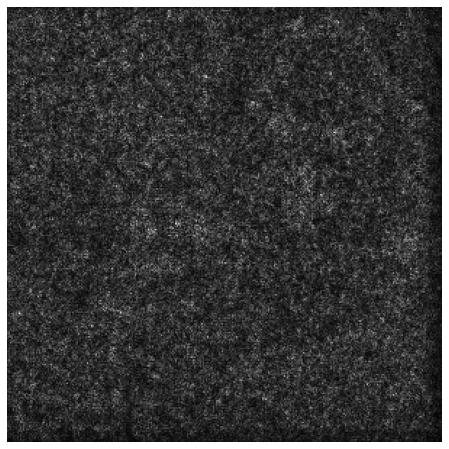

tf.Tensor([[0.49055642 0.5094436 ]], shape=(1, 2), dtype=float32)


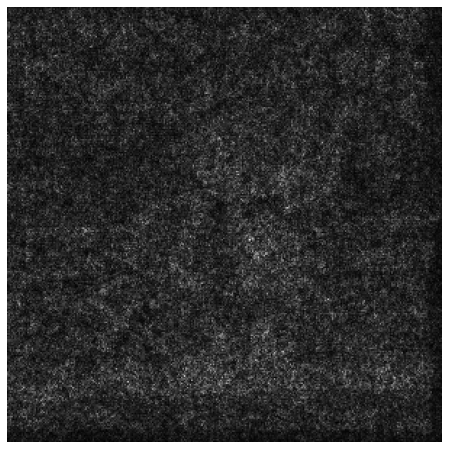

tf.Tensor([[0.49038067 0.50961936]], shape=(1, 2), dtype=float32)


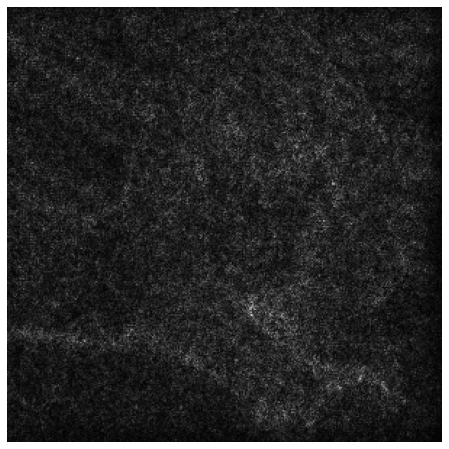

In [9]:
# load initial weights
model.load_weights('0_epochs.h5')

# generate the saliency maps for the 5 test images
# YOUR CODE HERE 
do_salience('cat1.jpg', model, 0, 'epoch0_salient') 
do_salience('cat2.jpg', model, 0, 'epoch0_salient') 
do_salience('catanddog.jpg', model, 0, 'epoch0_salient')  
do_salience('dog1.jpg', model, 1, 'epoch0_salient')  
do_salience('dog2.jpg', model, 1, 'epoch0_salient') 


With untrained weights, we will see something like this in the output. 
- We will see strong pixels outside the cat that the model uses that when classifying the image. 
- After training that these will slowly start to localize to features inside the pet.

<img src='https://drive.google.com/uc?export=view&id=1h5wP52lwbBUMVLlsgyb-tQl_I9eu42X7' alt='saliency'>


### Configure the model for training

Use `model.compile()` to define the loss, metrics and optimizer. 

* Choose a loss function for the model to use when training. 
  - For `model.compile()` the ground truth labels from the training set are passed to the model as **integers** (i.e. 0 or 1) as opposed to one-hot encoded vectors.
  - The model predictions are class probabilities. 
  - We can browse the [tf.keras.losses](https://www.tensorflow.org/api_docs/python/tf/keras/losses) and determine which one is best used for this case. 
  - Remember that we can pass the function as a string (e.g. `loss = 'loss_function_a'`). 

* For metrics, we can measure `accuracy`. 
* For the optimizer, use [RMSProp](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop).
  - Use the default learning rate of `0.001`.

In [10]:
# YOUR CODE HERE 
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='sparse_categorical_crossentropy', 
                optimizer=optimizer, 
                metrics=['accuracy'])

### Train model

In [11]:
# load pre-trained weights
model.load_weights('15_epochs.h5')

# train the model for just 3 epochs

EPOCHS = 3
model.fit(train_batches  ,
          epochs=EPOCHS   
          ) 

Epoch 1/3
582/582 [==============================] - 108s 177ms/step - loss: 0.4467 - accuracy: 0.7999
Epoch 2/3
582/582 [==============================] - 103s 173ms/step - loss: 0.4328 - accuracy: 0.8077
Epoch 3/3
582/582 [==============================] - 103s 173ms/step - loss: 0.4237 - accuracy: 0.8123


### Generate saliency maps at 18 epochs

We will now use our `do_salience()` function again on the same test images. Use the same parameters as before but this time, use the prefix `salient`.

tf.Tensor([[0.69875216 0.3012478 ]], shape=(1, 2), dtype=float32)


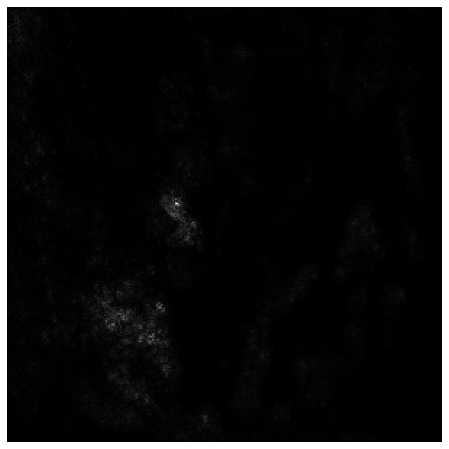

tf.Tensor([[0.61172205 0.388278  ]], shape=(1, 2), dtype=float32)


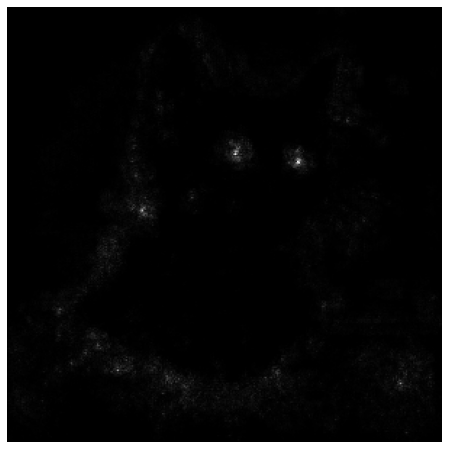

tf.Tensor([[0.3830928  0.61690724]], shape=(1, 2), dtype=float32)


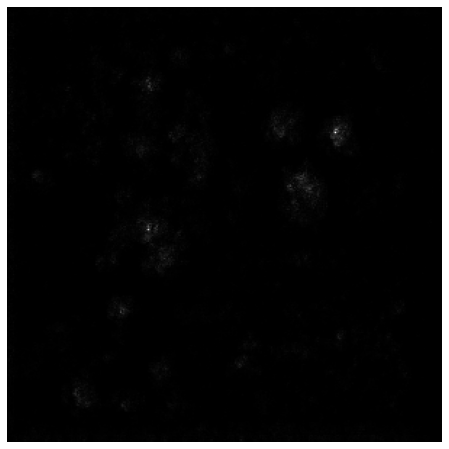

tf.Tensor([[0.4258018 0.5741982]], shape=(1, 2), dtype=float32)


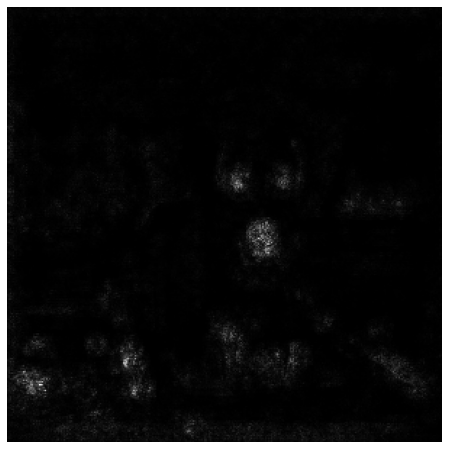

tf.Tensor([[0.31804776 0.68195224]], shape=(1, 2), dtype=float32)


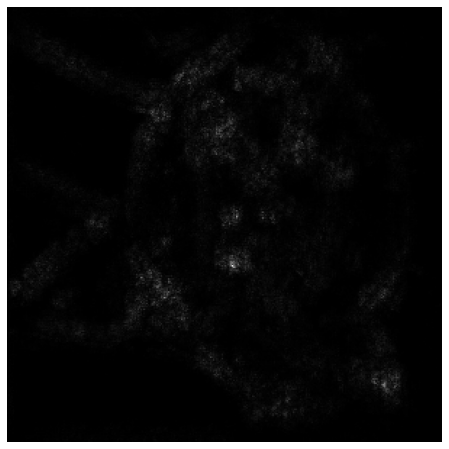

In [12]:
do_salience('cat1.jpg', model, 0, 'salient') 
do_salience('cat2.jpg', model, 0, 'salient') 
do_salience('catanddog.jpg', model, 0, 'salient')  
do_salience('dog1.jpg', model, 1, 'salient')  
do_salience('dog2.jpg', model, 1, 'salient') 

We will see that the strong pixels are now very less than the ones we generated earlier. Moreover, most of them are now found on features within the pet.

### Zip the images
Run the cell below to zip the normalized tensor images we generated at 18 epochs. If there is an error, check that we have files named:

* salientcat1.jpg
* salientcat2.jpg
* salientcatanddog.jpg
* salientdog1.jpg
* salientdog2.jpg

In [13]:
from zipfile import ZipFile

!rm images.zip

filenames = ['cat1.jpg', 'cat2.jpg', 'catanddog.jpg', 'dog1.jpg', 'dog2.jpg']

# writing files to a zipfile 
with ZipFile('images.zip','w') as zip:
  for file in filenames:
    zip.write('salient' + file)

print("images.zip generated!")

rm: cannot remove 'images.zip': No such file or directory
images.zip generated!


Saliency Maps at 95 epochs

We have pre-trained weights generated at 95 epochs and we can see the difference between the maps we generated at 18 epochs.

--2021-10-12 08:35:58--  https://docs.google.com/uc?export=download&id=14vFpBJsL_TNQeugX8vUTv8dYZxn__fQY
Resolving docs.google.com (docs.google.com)... 64.233.183.113, 64.233.183.139, 64.233.183.138, ...
Connecting to docs.google.com (docs.google.com)|64.233.183.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/old55vn96ca89c5t5uonmtajqgv7lioi/1634027700000/17311369472417335306/*/14vFpBJsL_TNQeugX8vUTv8dYZxn__fQY?e=download [following]
--2021-10-12 08:35:58--  https://doc-0o-6k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/old55vn96ca89c5t5uonmtajqgv7lioi/1634027700000/17311369472417335306/*/14vFpBJsL_TNQeugX8vUTv8dYZxn__fQY?e=download
Resolving doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-docs.googleusercontent.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to doc-0o-6k-docs.googleusercontent.com (doc-0o-6k-d

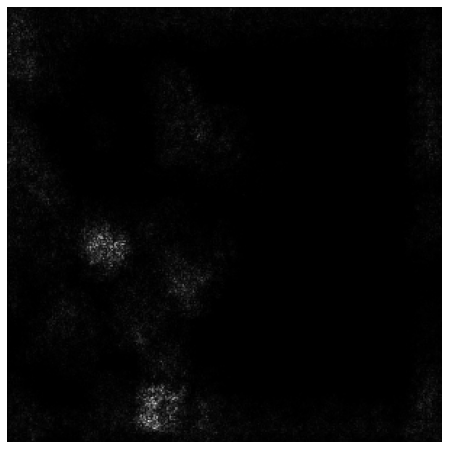

tf.Tensor([[0.9623281 0.0376719]], shape=(1, 2), dtype=float32)


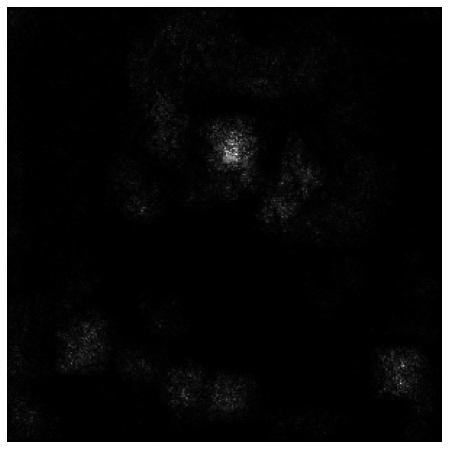

tf.Tensor([[0.9900357  0.00996426]], shape=(1, 2), dtype=float32)


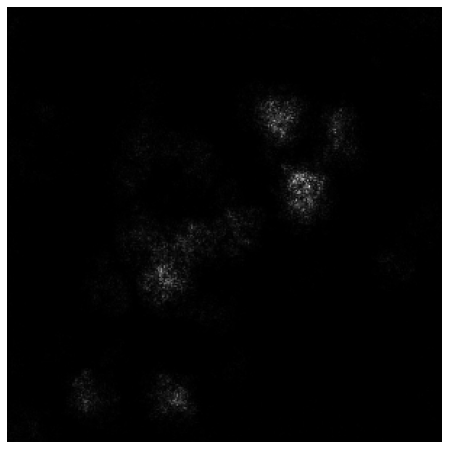

tf.Tensor([[1.1879375e-04 9.9988115e-01]], shape=(1, 2), dtype=float32)


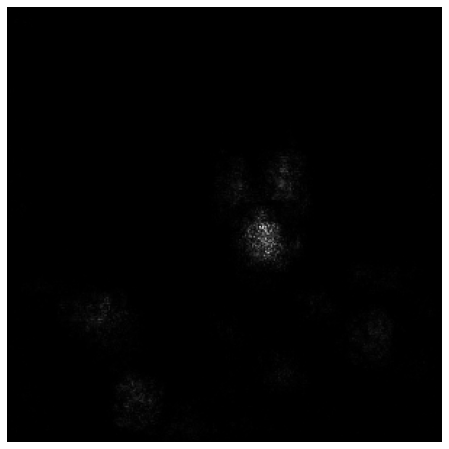

tf.Tensor([[8.677294e-05 9.999132e-01]], shape=(1, 2), dtype=float32)


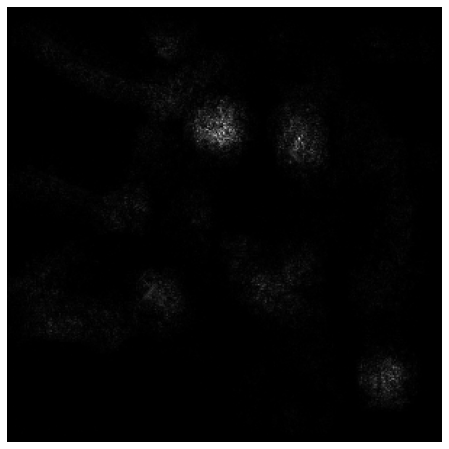

In [14]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=14vFpBJsL_TNQeugX8vUTv8dYZxn__fQY' -O 95_epochs.h5

model.load_weights('95_epochs.h5')

do_salience('cat1.jpg', model, 0, "epoch95_salient")
do_salience('cat2.jpg', model, 0, "epoch95_salient")
do_salience('catanddog.jpg', model, 0, "epoch95_salient")
do_salience('dog1.jpg', model, 1, "epoch95_salient")
do_salience('dog2.jpg', model, 1, "epoch95_salient")